In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import imutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
import cv2

path='/content/drive/MyDrive/Dataset_DL/Image_Treillis/'

In [ ]:
import cv2
image = cv2.imread('/content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1.jpg')

In [ ]:
display(image)

None

In [ ]:
gray = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)

In [ ]:
display(gray)

NameError: name 'gray' is not defined

In [ ]:
resized = cv2.resize(gray, (250, 250))

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
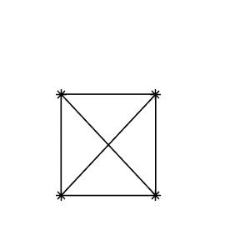

In [ ]:
display(resized)

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import imutils

def extract_trellis(image, plot=False):
    """
    Extract the trellis structure (contour) from an input image.

    Parameters:
    - image: Input image (in BGR format) containing the trellis structure.
    - plot: Boolean flag indicating whether to plot the original, thresholded, and cropped images for visualization purposes. Default is False.

    Returns:
    - new_image: Cropped image containing only the trellis structure.
    - contour: Contour of the trellis structure.
    """

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply thresholding to create a binary image
    _, thresh = cv2.threshold(blurred, 240, 255, cv2.THRESH_BINARY_INV)

    # Perform a series of erosions and dilations to remove any small regions of noise
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in the thresholded image
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    if len(cnts) == 0:
        print("No contours found!")
        return None, None

    # Assuming the largest contour corresponds to the trellis structure
    c = max(cnts, key=cv2.contourArea)

    # Get the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(c)

    # Crop the image to the bounding box
    new_image = image[y:y+h, x:x+w]

    if plot:
        plt.figure()

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')

        # plt.subplot(1, 3, 2)
        # plt.imshow(thresh, cmap='gray')
        # plt.title('Thresholded Image')

        plt.subplot(1, 3, 3)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
        plt.title('Cropped Image')

        plt.show()

    return new_image, c

# Folder containing the images
input_folder = path  # Update with your input folder path

# Output folder to save cropped images
output_folder = '/content/drive/MyDrive/Dataset_DL/N_cropped_images'




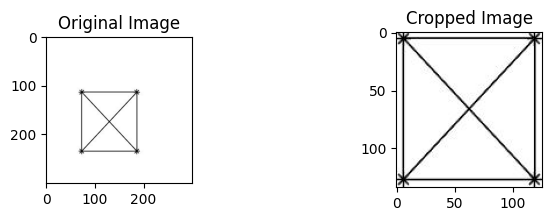

In [ ]:
new_image,c=extract_trellis(image, plot=True)

array([[[241, 241, 241],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 252, 252],
        [255, 255, 255],
        [254, 254, 254]],

       [[255, 255, 255],
        [237, 237, 237],
        [140, 140, 140],
        ...,
        [175, 175, 175],
        [238, 238, 238],
        [255, 255, 255]],

       [[254, 254, 254],
        [189, 189, 189],
        [  7,   7,   7],
        ...,
        [  0,   0,   0],
        [200, 200, 200],
        [255, 255, 255]],

       ...,

       [[252, 252, 252],
        [182, 182, 182],
        [  3,   3,   3],
        ...,
        [ 13,  13,  13],
        [223, 223, 223],
        [255, 255, 255]],

       [[255, 255, 255],
        [241, 241, 241],
        [169, 169, 169],
        ...,
        [202, 202, 202],
        [246, 246, 246],
        [245, 245, 245]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [255, 255, 255]]], dtype=uint8)
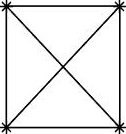

In [ ]:
display(new_image)

In [ ]:
# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Loop through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)
        if image is not None:
            print(f"Processing {image_path}")
            cropped_image, contour = extract_trellis(image, plot=False)
            cropped_image= cv2.resize(cropped_image, (50, 50))

            if cropped_image is not None:
                # Save the cropped image
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, cropped_image)
        else:
            print(f"Error: Unable to load image at {image_path}")

Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1002.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1004.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1003.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1005.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1006.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1007.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1008.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1009.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1010.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1011.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1012.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1013.jpg
Processing /content/drive/MyDrive/Dataset_DL/Image_Treillis/ICTSD1014.jpg
Processing /content/drive/MyDrive/Data

In [ ]:
import cv2
image = cv2.imread('/content/drive/MyDrive/Dataset_DL/N_cropped_images/ICTSD1.jpg')

array([[[243, 243, 243],
        [255, 255, 255],
        [ 40,  40,  40],
        ...,
        [ 38,  38,  38],
        [253, 253, 253],
        [248, 248, 248]],

       [[254, 254, 254],
        [ 66,  66,  66],
        [ 30,  30,  30],
        ...,
        [ 25,  25,  25],
        [ 48,  48,  48],
        [252, 252, 252]],

       [[ 39,  39,  39],
        [ 32,  32,  32],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [ 33,  33,  33],
        [ 37,  37,  37]],

       ...,

       [[ 45,  45,  45],
        [ 35,  35,  35],
        [  3,   3,   3],
        ...,
        [  6,   6,   6],
        [ 33,  33,  33],
        [ 42,  42,  42]],

       [[253, 253, 253],
        [ 54,  54,  54],
        [ 22,  22,  22],
        ...,
        [ 24,  24,  24],
        [ 70,  70,  70],
        [254, 254, 254]],

       [[245, 245, 245],
        [252, 252, 252],
        [ 37,  37,  37],
        ...,
        [ 39,  39,  39],
        [255, 255, 255],
        [248, 248, 248]]], dtype=uint8)
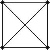

In [ ]:
image

In [ ]:
cropped_image= cv2.resize(image, (250, 250))

array([[[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[243, 243, 243],
        [243, 243, 243],
        [243, 243, 243],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       ...,

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]]], dtype=uint8)
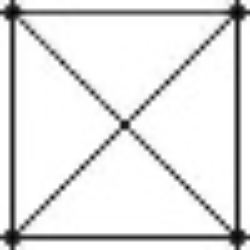

In [ ]:
cropped_image

## Creating Labls

In [ ]:
path_df='/content/drive/MyDrive/Dataset_DL/DataStuctures/DataSetTrussStructureContraintes.xlsx'

In [ ]:
df= pd.read_excel(path_df)

In [ ]:
df.head()

,C1,C2,C3,C4,C5,C6,N° image
0,-49413.749818,-55408.642923,0,39179.827147,69881.595161,39179.827147,1
1,-64454.631262,-24232.793281,0,-27591.883860,129900.164436,-6299.320851,2
2,-46291.240662,-53793.898904,0,48328.429233,57418.869607,50211.144062,3
3,-88722.556188,14463.601816,0,1388.186340,123996.252997,15405.208939,4
4,-104616.669276,16680.435366,0,51565.843192,86314.545613,42381.216503,5


In [ ]:
import pandas as pd
import numpy as np

def classify_dataset(data, output_file_path):
    # Drop the specified columns
    X=data['N° image']
    data = data.drop(['N° image', 'C3'], axis=1)

    # Calculate the mean of each column
    column_means = np.abs(data.mean())

    print("Column Means:", column_means)

    # Function to classify a row
    def classify_row(row):
        # Compare each value in the row to the corresponding column mean
        for col in data.columns:
            if np.abs(row[col]) <= np.abs(column_means[col]):
                return 0
        return 1

    # Apply the classification to each row and create a new column 'Class'
    data['Class'] = data.apply(classify_row, axis=1)
    data['N° image']=X

    # Save the dataset with the new 'Class' column
    data.to_csv(output_file_path, index=False)

    return data




In [ ]:
path_output='/content/drive/MyDrive/Dataset_DL/DataStuctures/DataSetTrussStructure.csv'

In [ ]:
classified_df = classify_dataset(df, path_output)


In [ ]:
classified_df['Class'].unique()

array([0, 1])

In [ ]:
print(classified_df['Class'].value_counts())

Class
0    1905
1      96
Name: count, dtype: int64


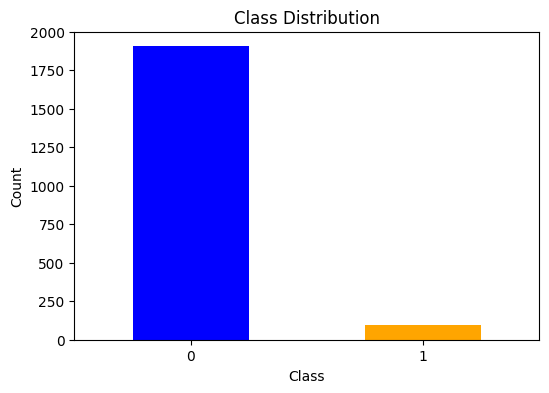

In [ ]:
class_counts = pd.Series([1905, 96], index=[0, 1], name='Class')

# Plotting the class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
data=classified_df.copy()

In [ ]:
data['N° image'] = data['N° image'].astype(str)

In [ ]:
data['Class'] = data['Class'].astype(str)

In [ ]:
output_file_path = '/content/drive/MyDrive/Dataset_DL/DataStuctures/DataSetTruss.csv'  # Replace with your desired file path

data.to_csv(output_file_path, index=False)

In [ ]:
image_dir = r'/content/drive/MyDrive/Dataset_DL/N_cropped_images'

In [ ]:
filenames = os.listdir(image_dir)

In [ ]:
df = pd.DataFrame({'filename': filenames})

In [ ]:
df.head()

,filename
0,ICTSD1002.jpg
1,ICTSD1004.jpg
2,ICTSD1003.jpg
3,ICTSD1005.jpg
4,ICTSD1006.jpg


In [ ]:
data['filename'] = data['N° image'].apply(lambda x: f'ICTSD{x}.jpg')

# Step 3: Create the new dataset with filenames and corresponding labels
new_df = data[['filename', 'Class']]

In [ ]:
new_df.head()

,filename,Class
0,ICTSD1.jpg,0
1,ICTSD2.jpg,0
2,ICTSD3.jpg,0
3,ICTSD4.jpg,0
4,ICTSD5.jpg,1


In [ ]:
output_file_path = '/content/drive/MyDrive/Dataset_DL/DataStuctures/ImageDataSetTruss.csv'  # Replace with your desired file path

new_df.to_csv(output_file_path, index=False)

In [4]:
output_file_path = '/content/drive/MyDrive/Dataset_DL/DataStuctures/ImageDataSetTruss.csv'
image_dir = r'/content/drive/MyDrive/Dataset_DL/N_cropped_images'

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Dataset_DL/N_cropped_images/ICTSD1.jpg')

array([[[243, 243, 243],
        [255, 255, 255],
        [ 40,  40,  40],
        ...,
        [ 38,  38,  38],
        [253, 253, 253],
        [248, 248, 248]],

       [[254, 254, 254],
        [ 66,  66,  66],
        [ 30,  30,  30],
        ...,
        [ 25,  25,  25],
        [ 48,  48,  48],
        [252, 252, 252]],

       [[ 39,  39,  39],
        [ 32,  32,  32],
        [  1,   1,   1],
        ...,
        [  0,   0,   0],
        [ 33,  33,  33],
        [ 37,  37,  37]],

       ...,

       [[ 45,  45,  45],
        [ 35,  35,  35],
        [  3,   3,   3],
        ...,
        [  6,   6,   6],
        [ 33,  33,  33],
        [ 42,  42,  42]],

       [[253, 253, 253],
        [ 54,  54,  54],
        [ 22,  22,  22],
        ...,
        [ 24,  24,  24],
        [ 70,  70,  70],
        [254, 254, 254]],

       [[245, 245, 245],
        [252, 252, 252],
        [ 37,  37,  37],
        ...,
        [ 39,  39,  39],
        [255, 255, 255],
        [248, 248, 248]]], dtype=uint8)
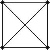

In [ ]:
display(image)

In [3]:
import os
from collections import Counter
import torch
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from torchvision import transforms
from PIL import Image
import pandas as pd


In [ ]:
# Count the number of labels
label_counts = Counter()
for _, labels in data_loader:
    label_counts.update(labels.numpy())

# Print the counts
print(label_counts)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Counter({0: 1905, 1: 192})


In [ ]:
# criterion = nn.CrossEntropyLoss()
# # Define the optimizer
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
import pandas as pd
from PIL import Image
import os
from collections import Counter
import torch
from torch.utils.data import DataLoader, Dataset, ConcatDataset
from torchvision import transforms
from PIL import Image
import pandas as pd

In [6]:
class ImageDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data_frame.iloc[idx, 0])
        image = Image.open(img_name).convert("L")
        label = self.data_frame.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)

        return image, label


In [7]:
class DynamicCNNBinary(nn.Module):
    def __init__(self, input_size):
        super(DynamicCNNBinary, self).__init__()
        self.input_size = input_size

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)

        # Define the max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Calculate the output size after convolution and pooling layers
        conv_output_size = self.calculate_conv_output_size(input_size)

        # Define the fully connected layers
        self.fc1 = nn.Linear(32 * conv_output_size * conv_output_size, 128)
        self.fc2 = nn.Linear(128, 1)  # 1 output neuron for binary classification

    def calculate_conv_output_size(self, input_size):
        # Calculate the output size after convolution and pooling layers
        conv_output_size = input_size // 2 // 2  # Two max pooling layers with kernel size 2
        return conv_output_size

    def forward(self, x):
        # Apply convolutional layers with ReLU activation and max pooling
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))

        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 32 * self.calculate_conv_output_size(self.input_size) * self.calculate_conv_output_size(self.input_size))

        # Apply fully connected layers with ReLU activation
        x = torch.relu(self.fc1(x))

        # Apply the final layer
        x = self.fc2(x)
        return x


In [8]:
# Initialize the model
input_size = 50
model = DynamicCNNBinary(input_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# Define the original data augmentation transformations
original_transforms = transforms.Compose([
    transforms.Resize((input_size, input_size)),
    transforms.ToTensor(),
])

# Define the data augmentation transformations for the minority class
minority_class_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(input_size, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
])

In [10]:
# Create the dataset
csv_file = '/content/drive/MyDrive/Dataset_DL/DataStuctures/ImageDataSetTruss.csv'
image_dir = r'/content/drive/MyDrive/Dataset_DL/N_cropped_images'
dataset = ImageDataset(csv_file=csv_file, root_dir=image_dir, transform=original_transforms)

# Split the dataset into majority and minority classes
minority_class = 1
minority_df = dataset.data_frame[dataset.data_frame['Class'] == minority_class]
majority_df = dataset.data_frame[dataset.data_frame['Class'] != minority_class]

# Create the minority class dataset
minority_dataset = ImageDataset(csv_file=csv_file, root_dir=image_dir, transform=minority_class_transforms)
minority_dataset.data_frame = minority_df  # Assign only the minority class dataframe

# Concatenate the original and augmented datasets
augmented_minority_dataset = ConcatDataset([dataset, minority_dataset])

In [11]:
# Ensure the sum of the split lengths matches the total dataset length
dataset_size = len(augmented_minority_dataset)
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = dataset_size - train_size - val_size

# Split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(augmented_minority_dataset, [train_size, val_size, test_size])

# Create data loaders for training, validation, and test sets
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Epoch [1/100], Training Loss: 0.0000, Validation Loss: 0.0347
Epoch [2/100], Training Loss: 0.0000, Validation Loss: 0.0347
Epoch [3/100], Training Loss: 0.0000, Validation Loss: 0.0347
Epoch [4/100], Training Loss: 0.0000, Validation Loss: 0.0349
Epoch [5/100], Training Loss: 0.0000, Validation Loss: 0.0349
Epoch [6/100], Training Loss: 0.0000, Validation Loss: 0.0346
Epoch [7/100], Training Loss: 0.0000, Validation Loss: 0.0346
Epoch [8/100], Training Loss: 0.0001, Validation Loss: 0.0351
Epoch [9/100], Training Loss: 0.0298, Validation Loss: 0.0286
Epoch [10/100], Training Loss: 0.0257, Validation Loss: 0.0225
Epoch [11/100], Training Loss: 0.0030, Validation Loss: 0.0340
Epoch [12/100], Training Loss: 0.0046, Validation Loss: 0.0320
Epoch [13/100], Training Loss: 0.0061, Validation Loss: 0.0406
Epoch [14/100], Training Loss: 0.0015, Validation Loss: 0.0328
Epoch [15/100], Training Loss: 0.0003, Validation Loss: 0.0379
Epoch [16/100], Training Loss: 0.0003, Validation Loss: 0.0374
E

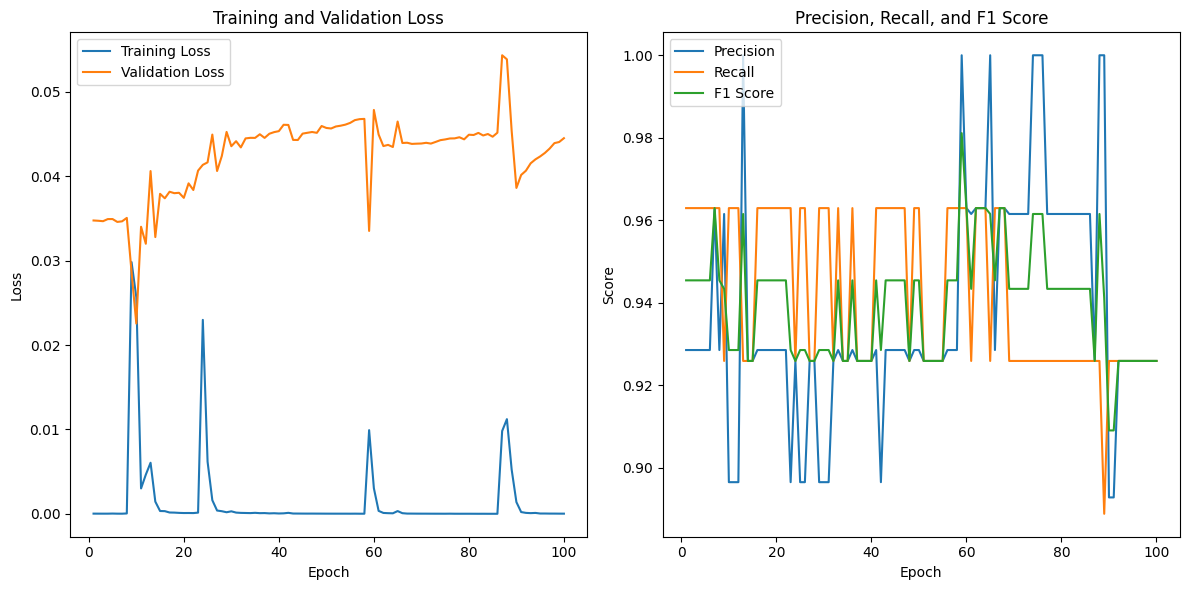

Finished Training


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Training loop
num_epochs = 100

train_losses = []
val_losses = []
val_accuracies = []
precisions = []
recalls = []
f1_scores = []

for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.float().to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs.squeeze(), labels.squeeze())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    # Compute the training loss for the epoch
    epoch_train_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.float().to(device)

            # Forward pass
            outputs = model(inputs)

            # Compute the loss
            loss = criterion(outputs.squeeze(), labels.squeeze())
            val_loss += loss.item() * inputs.size(0)

            # Convert outputs to probabilities by applying sigmoid activation
            probabilities = torch.sigmoid(outputs)

            # Convert probabilities to binary predictions (0 or 1)
            predictions = (probabilities > 0.5).float()

            # Collect all labels and predictions for further evaluation
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

            # Count correct predictions
            correct_predictions += torch.sum(predictions.squeeze() == labels).item()

            # Count total predictions
            total_predictions += labels.size(0)

    # Compute additional evaluation metrics
    epoch_val_loss = val_loss / len(val_dataset)
    val_losses.append(epoch_val_loss)
    val_accuracies.append(correct_predictions / total_predictions)

    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions)

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print the loss for each epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {epoch_train_loss:.4f}, '
          f'Validation Loss: {epoch_val_loss:.4f}')

# Print final evaluation metrics after training
print(f'Final Validation Accuracy: {val_accuracies[-1] * 100:.2f}%')
print(f'Final Precision: {precisions[-1]:.4f}')
print(f'Final Recall: {recalls[-1]:.4f}')
print(f'Final F1 Score: {f1_scores[-1]:.4f}')

# Plotting
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Metrics plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), precisions, label='Precision')
plt.plot(range(1, num_epochs + 1), recalls, label='Recall')
plt.plot(range(1, num_epochs + 1), f1_scores, label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

print('Finished Training')


In [ ]:
 from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

Test Loss: 0.0372
Accuracy: 99.68%
R2 Score: 0.9549
Mean Squared Error: 0.0032
Mean Absolute Error: 0.0032
Precision: 1.0000
Recall: 0.9583
F1 Score: 0.9787


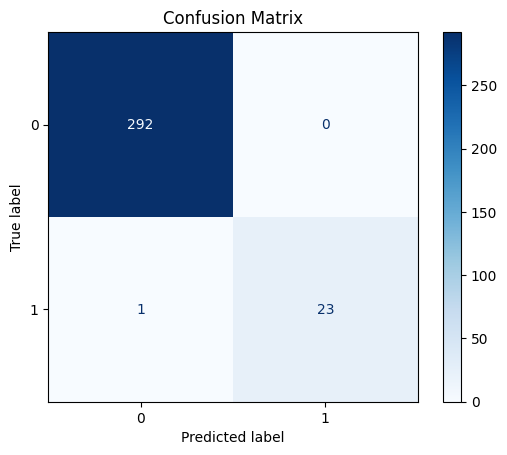

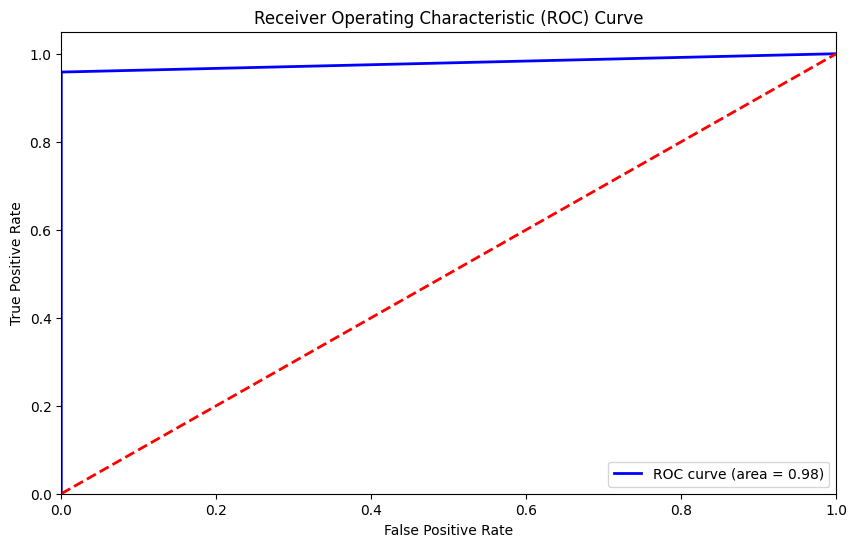

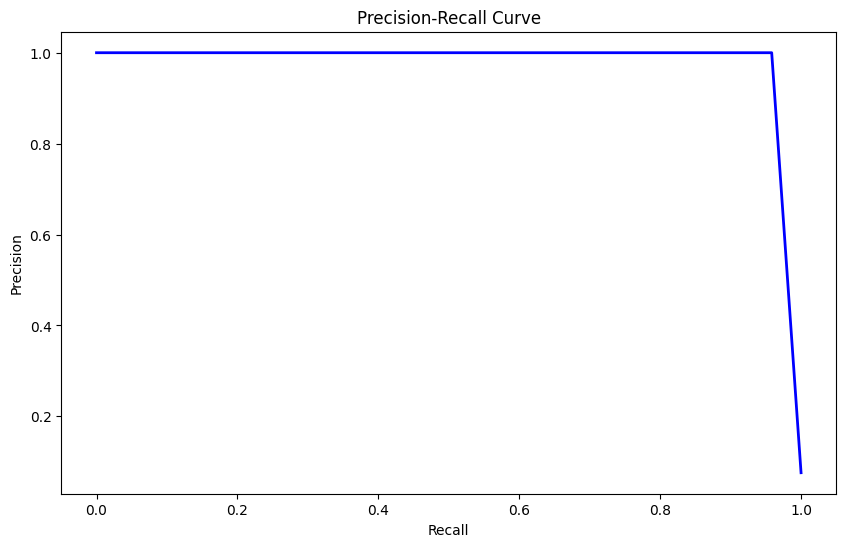

In [18]:
import torch
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# Evaluation on the test set with plotting
model.eval()
test_loss = 0.0
all_labels = []
all_predictions = []
correct_predictions = 0
total_predictions = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.float().to(device)

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs.squeeze(), labels.squeeze())
        test_loss += loss.item() * inputs.size(0)

        # Convert outputs to probabilities by applying sigmoid activation
        probabilities = torch.sigmoid(outputs)

        # Convert probabilities to binary predictions (0 or 1)
        predictions = (probabilities > 0.5).float()

        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

        # Count correct predictions
        correct_predictions += torch.sum(predictions.squeeze() == labels).item()

        # Count total predictions
        total_predictions += labels.size(0)

# Compute the test loss
test_loss = test_loss / len(test_dataset)

# Compute accuracy
accuracy = correct_predictions / total_predictions

# Convert to numpy arrays for metrics and plotting
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
r2 = r2_score(all_labels, all_predictions)
mse = mean_squared_error(all_labels, all_predictions)
mae = mean_absolute_error(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)

# Print the metrics
print(f'Test Loss: {test_loss:.4f}')
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'R2 Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(all_labels, all_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting the Precision-Recall Curve
precision, recall, _ = precision_recall_curve(all_labels, all_predictions)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [19]:
model_path = '/content/drive/MyDrive/Dataset_DL/Truss_structure_prediction.pth'
torch.save(model.state_dict(), model_path)